In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# EDA

## Initial Data Exploration

```text
Variable	Definition	     Key
survival	Survival	     0 = No, 1 = Yes
pclass	    Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton
```

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Size of the dataset
print("Rows, Columns:", df.shape)

Rows, Columns: (891, 12)


In [4]:
# information
print("Information:")
df.info()

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summary Stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- `Age`: ~20% missing
- `Cabin`: ~77% missing
- `Embarked`: ~0.2% missing

In [6]:
# Missing values?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
 # Duplicate values?
df.duplicated().sum()

0

## Univariate Analysis
- Categoriacal Variables: Survived, Pclass, Sex, SibSp, Parch, Cabin, Embarked
- Numerical Variables: PassengerId, Age, and Fare

`Survived`
- Only 342 people survived out of 891 people.
- About 38.38% survival rate

In [8]:
# Value Counts
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

`Pclass`
- ~55% or majority of people were in 3rd class, indicating it was more affordable
- Anotehr thing to note, data isn't evenly distributed between classes

In [9]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

`Sex`
- About 64% were male passengers

In [10]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

`Embarked`
-  C = Cherbourg, Q = Queenstown, S = Southampton
-  Majority of passenger (72.27%) embarked from Southampton, from where titanic started its journey

In [11]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

For numerical columns, we will look at distribution, central tendency, outliers since `value_counts()` doesn't make sense for a numerical value.

`Age`
- Age count: 714, about 20% data missing
- Mean vs Median, not a big difference, so we can distribution is fairly normal. (very different means distribution is skewed or have outliers)

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

`SibSp`

In [13]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

`Parch`

In [14]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

`Fare`

In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Visualizations

In [16]:
sns.set_style("whitegrid")

#### `Survival Count Plot`

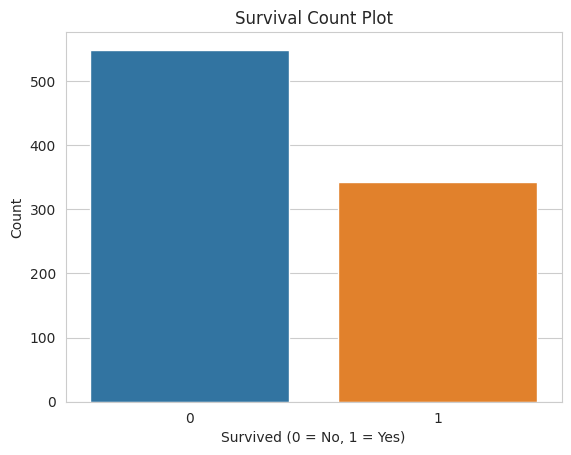

In [17]:
sns.countplot(data=df, x='Survived')
plt.title("Survival Count Plot")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### `Pclass Count plot`

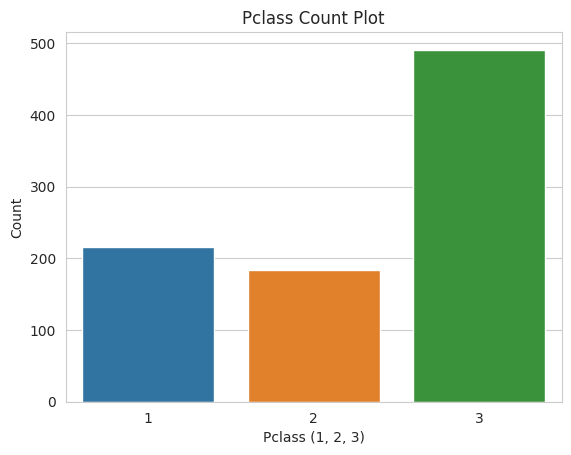

In [18]:
sns.countplot(data=df, x='Pclass')
plt.title("Pclass Count Plot")
plt.xlabel("Pclass (1, 2, 3)")
plt.ylabel("Count")
plt.show()

In [19]:
df.groupby("Survived")['Pclass'].value_counts(normalize=True)

Survived  Pclass
0         3         0.677596
          2         0.176685
          1         0.145719
1         1         0.397661
          3         0.347953
          2         0.254386
Name: proportion, dtype: float64

#### `Sex Count Plot`

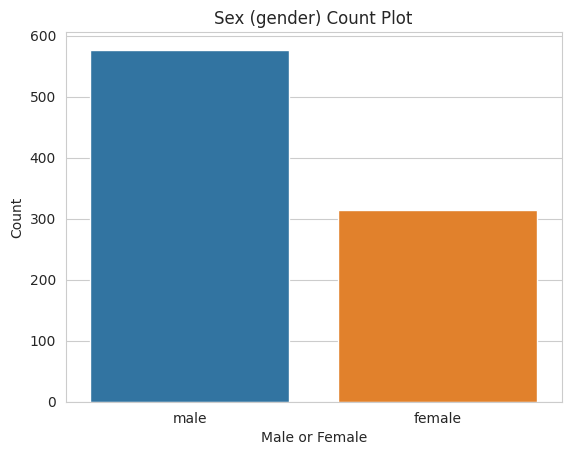

In [20]:
sns.countplot(data=df, x='Sex')
plt.title("Sex (gender) Count Plot")
plt.xlabel("Male or Female")
plt.ylabel("Count")
plt.show()

In [21]:
df.groupby("Survived")['Sex'].value_counts(normalize=True)

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: proportion, dtype: float64

#### `Age Histogram`
- 20-30 age group had more passengers, young adults dominated
- The distribution is Right-Skewed (tail extends towards older passengers)
- More young people and fewer older people
- We can conclude that young people that time were more likely to travel

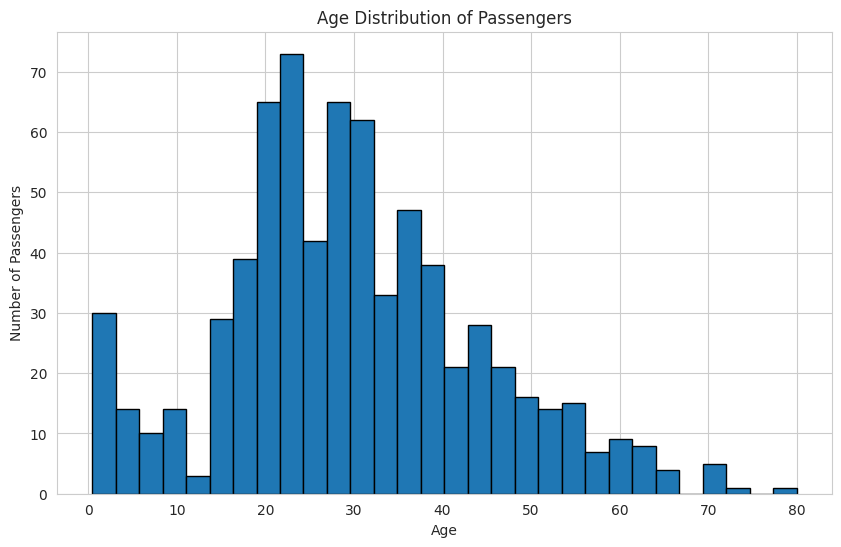

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

`Fare`
- We can see that the distribution is extremely right-skewed
- Most passengers paid low fares
- Highest fare 512, paid by very few customers, extreme outlier
- We can trace it back to when we got `Pclass` counts, where 3rd class had most passengers, now we know why
- While Titanic was a luxury, it still offered affordable fares, and if we look for it we get to know that 3rd class of Titanic was quite better than many of her rivals

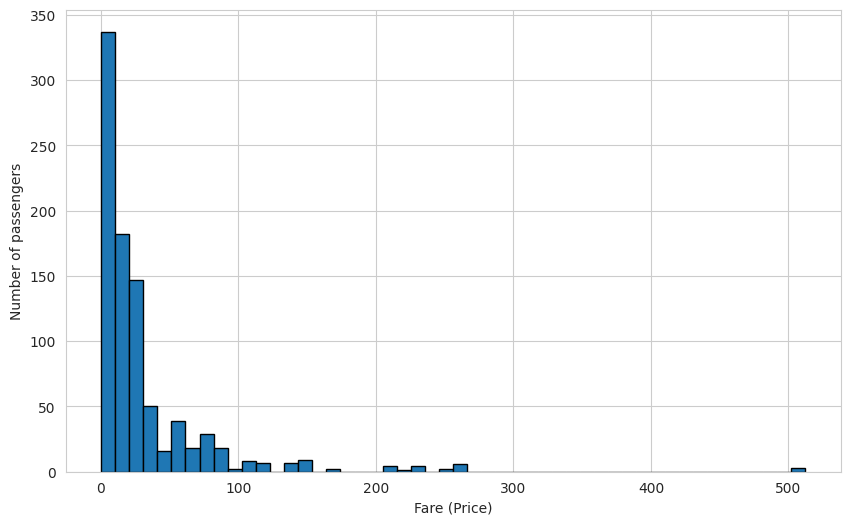

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=50, edgecolor='black')
plt.xlabel("Fare (Price)")
plt.ylabel("Number of passengers")
plt.show()

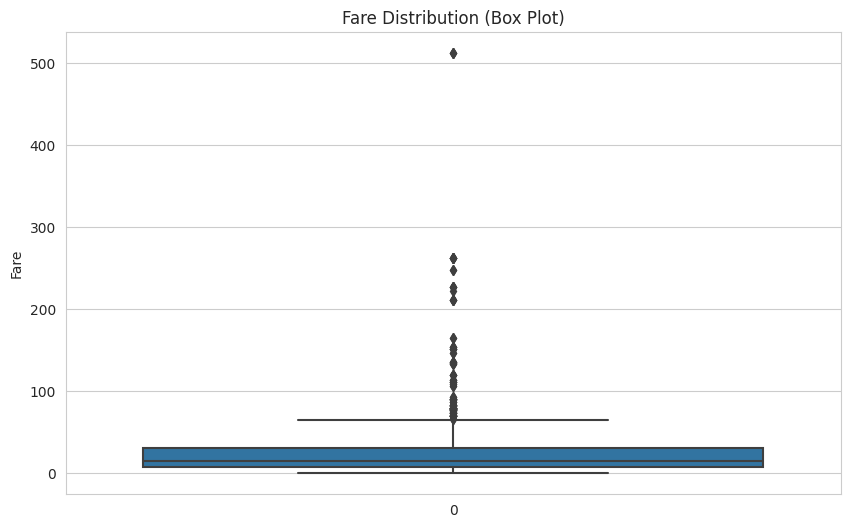

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Fare'])
plt.title("Fare Distribution (Box Plot)")
plt.ylabel("Fare")
plt.show()

## Bivariate Analysis

#### `Survival by gender`
- We can observe that male mortality compared to survival is more
- And Survival rate of female is more compared to their mortality
- There is quite a lot of difference between male and female survivor

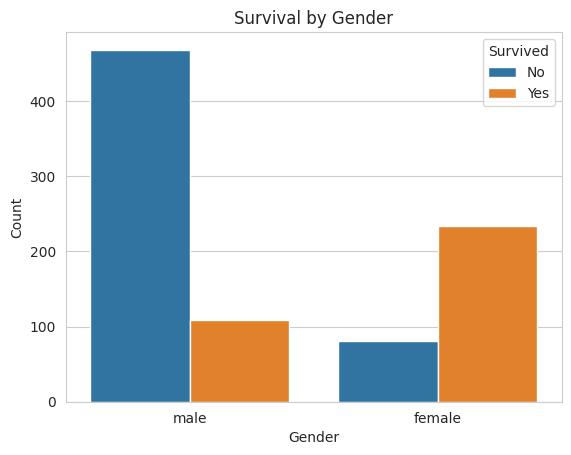

In [25]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#### `Survival by Age Group`
Since age is numerical (0-80) not categorical we create age groups:
- Children: 0-12 years
- Teen: 13-17 years
- Adult: 18-59 years
- Elderly: 60+ years

* Children had better survival rate, though a lot did not survive but the surviving bar is higher 
* Teens had almost equal bar just mortality one being slightly higher
* Adult had low survival, 300 something did not survive out of 500 something adults
* Elderly had bad survival rate (maybe due to age)

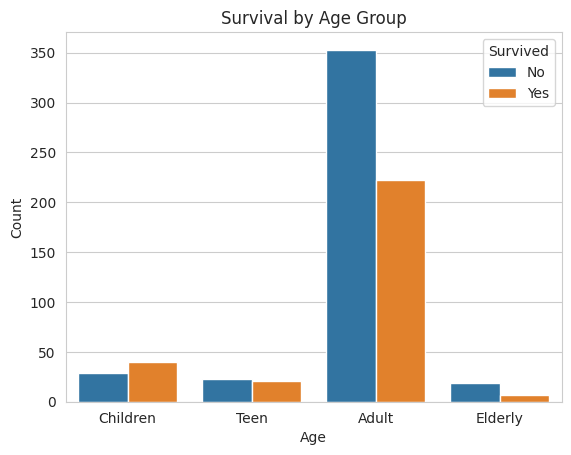

In [26]:
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins = [0, 12, 17, 59, 80],
    labels = ["Children", "Teen", "Adult", "Elderly"]
)

sns.countplot(data=df, x="AgeGroup", hue="Survived")
plt.title("Survival by Age Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [27]:
df["AgeGroup"].value_counts()

AgeGroup
Adult       575
Children     69
Teen         44
Elderly      26
Name: count, dtype: int64

#### Did passenger class matter?
- Based on the plot we can assume that passenger class did matter
- 1st class had more survival than mortality, while 3rd class had more passengers that did not survive
- 2nd class had slightly higher number of passengers that did not survive than the number of passengers that survive

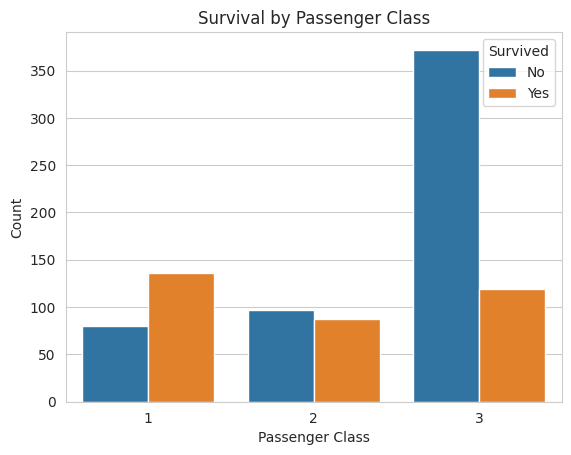

In [28]:
sns.countplot(data=df, x="Pclass", hue='Survived')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#### `Survival by Class and Gender`
- We know that women survivors were more, but did being a women in 1st and 2nd class gave the best odds? Was 3rd class worst for men or both men and women?
    - For males, more passengers did not survive in all classes, splecially in 3rd class where the bar of no survival is exceptinally high.
    - Women, on the other hand had better survival rate specially 1st and 2nd class.
    - In 3rd class, survived and not survived for women was almost same, we can say there was approximately 50% chance that a women in 3rd class will survive.


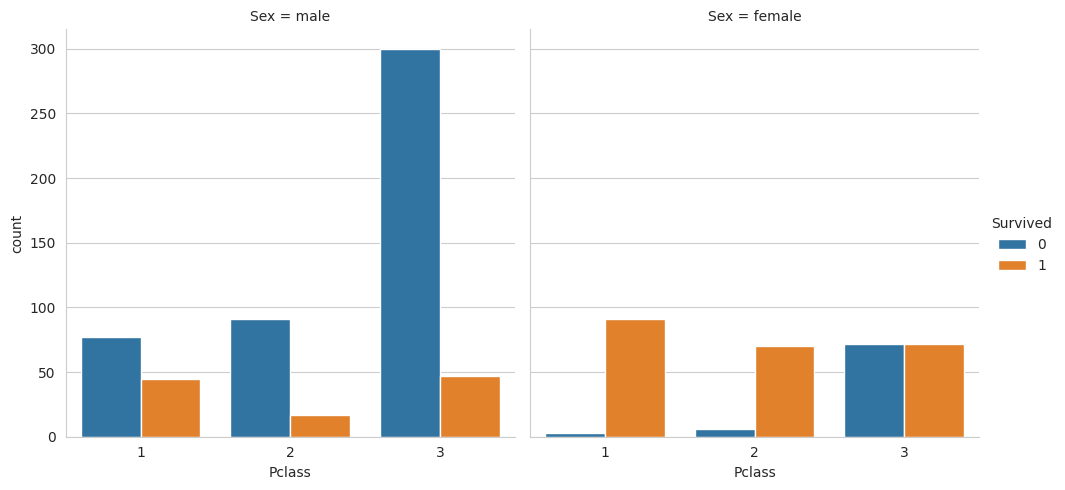

In [29]:
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count')
plt.show()

#### `Age Distribution of Survivors and Non-Surviors`
- Children had better survival
- Adults on the other hand were more in `died` category
- 70s group we can observe that almost all died
- The 80 year old survivor stands out as they survived and are an outlier 

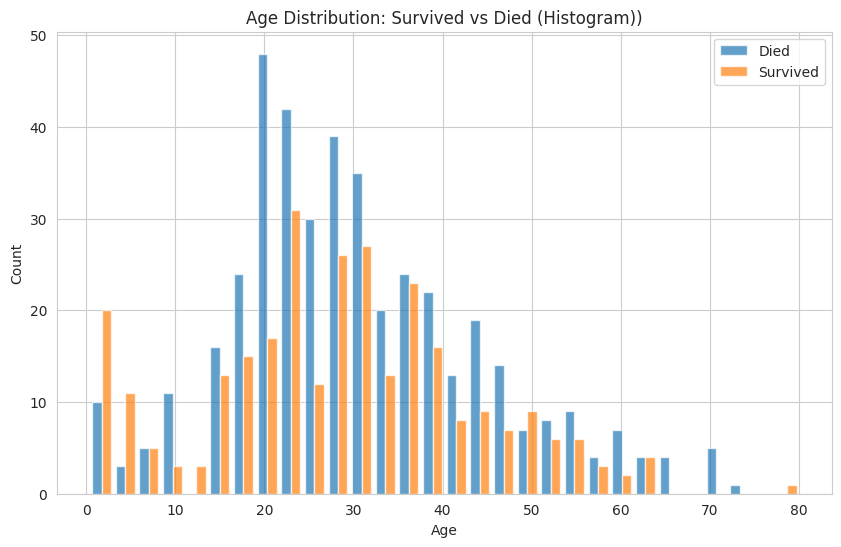

In [30]:
# Histogram
# separating survivors and non-survivors
# drop nulls for now
survived = df[df['Survived'] == 1]['Age'].dropna()
died = df[df['Survived'] == 0]['Age'].dropna()

plt.figure(figsize=(10, 6))
plt.hist([died, survived], bins=30, label=['Died', 'Survived'], alpha=0.7)
plt.title("Age Distribution: Survived vs Died (Histogram))")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

#### `Did having Siblings/Spouses affect the survival`
- No Sibling/Spouse: Survival rate decreased
- 1 Sibling/Spouse: Better chance of survival, they can help each other
- 2+ Sibling/Spouse: Low survival, in chaos looking after each other and coordinating becomes hard

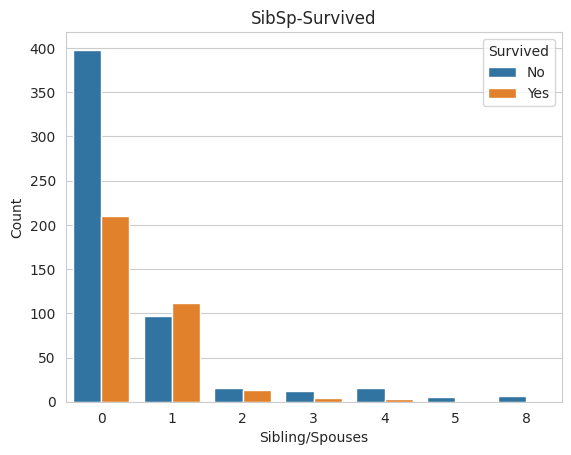

In [31]:
sns.countplot(data=df, x="SibSp", hue="Survived")
plt.title("SibSp-Survived")
plt.xlabel("Sibling/Spouses")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#### `Parch-Survival`
- Similar to `SibSp`, 0 Parch decreases survival, since no one to help
- 1-3, good enough to have better survival, not too small not too big
- 4+ Very low or almost no survival 

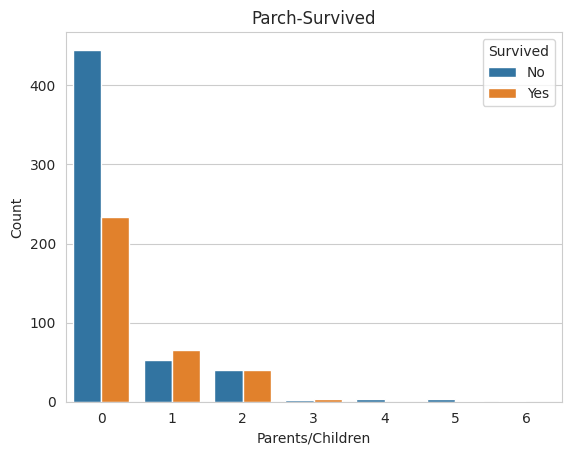

In [32]:
sns.countplot(data=df, x="Parch", hue="Survived")
plt.title("Parch-Survived")
plt.xlabel("Parents/Children")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

`FamilySize`
- `SibSp` + `Parch` + 1 (Passenger)

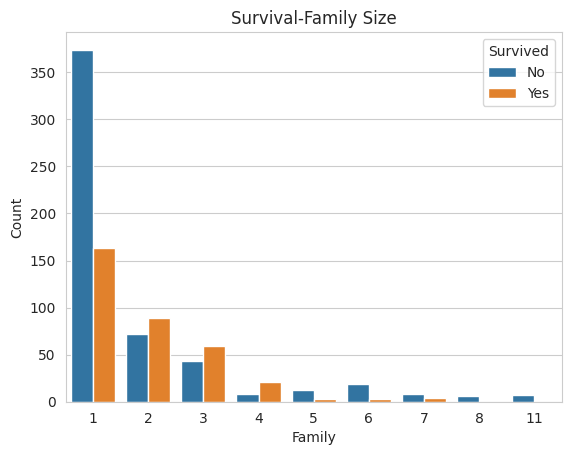

In [33]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# visualizing srvival-family
sns.countplot(data=df, x="FamilySize", hue="Survived")
plt.title("Survival-Family Size")
plt.xlabel("Family")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

## Handling Missing Vlaues
- `Age`: ~20% missing
- `Cabin`: ~77% missing
- `Embarked`: ~0.2% missing

##### Age

#### `Comparing Survival rates - Age known vs Age unknown`
- Were the missing ages random? Does not look so
  - 70% of passangers who did not survive, their ages are missing
  - No proper records, if we look about it, this is one of the reasons
  - A lot of passengers who died were in 3rd class, which was mostly poor immigrants and might not have proper details about them
  - Maybe low-ranking crew members
  

In [34]:
print("Survival Rate - Age known")
print(df[df['Age'].notna()]['Survived'].value_counts(normalize=True))

print("Survival Rate - Age unknown")
print(df[df['Age'].isna()]['Survived'].value_counts(normalize=True))

Survival Rate - Age known
Survived
0    0.593838
1    0.406162
Name: proportion, dtype: float64
Survival Rate - Age unknown
Survived
0    0.706215
1    0.293785
Name: proportion, dtype: float64


`Median age for different groups`
- Passengers on 1st class were older than 2nd class passengers
- 3rd class passengers were on younger side than the other 2
- We can say that passengers on 1st class were more settled and older people in their life
- 3rd calss poor young immigrants for travel and opportunities

In [35]:
df.groupby(["Pclass", "Sex"])["Age"].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

`Filling ages with the median based on their group`

In [36]:
df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))
print(df['Age'].isnull().sum())

0


##### Embarked
- What we know now:
  - Both Survived
  - Both Female
  - Both had no company
  - Same Cabin B28 and 1st Class


In [37]:
df[df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Adult,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Elderly,1


- To get the port they likely embarked from, we look for similar passengers

In [38]:
df[(df["Pclass"] == 1) & (df["Fare"] > 75) & (df["Fare"] < 85)]["Embarked"].value_counts()

Embarked
C    16
S    13
Name: count, dtype: int64

In [39]:
# Filling Embarked missing values with C
df["Embarked"].fillna("C", inplace=True)
print(df["Embarked"].isnull().sum())

0


#### `Embarked-Survival`
- After checking passengers from there embarking port and the class they got on
- We can observe:
  - S had mix of all, but majority were 3rd class and from visualization we can understand the high mortality rate
  - Q had fewer passengers overall, but majority here were in 3rd class as well
  - C also had mixed class and more balanced than S, but higher were from 1st class

In [40]:
df.groupby("Pclass")["Embarked"].value_counts()

Pclass  Embarked
1       S           127
        C            87
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64

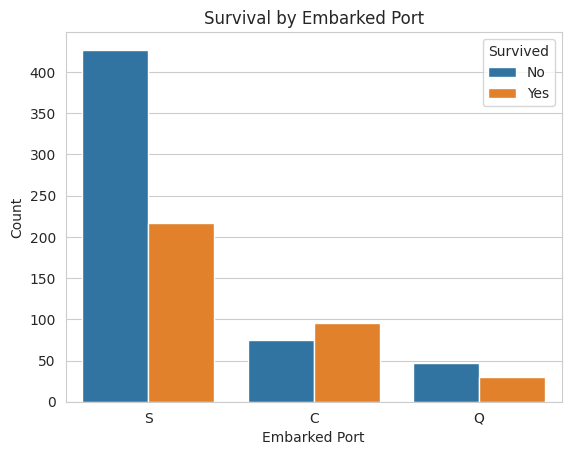

In [41]:
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival by Embarked Port")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

##### Cabin

In [42]:
# investigating cabin
print(f"Known Cabin: {df['Cabin'].notna().sum()}")
print(f"Unknown Cabin: {df['Cabin'].isna().sum()}")
print(f"Percentage of cabin missing: {df['Cabin'].isna().sum() / len(df) * 100:.1f}%")


Known Cabin: 204
Unknown Cabin: 687
Percentage of cabin missing: 77.1%


In [43]:
df[df["Cabin"].notna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Children,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Adult,1


Extracting Deck information

In [44]:
df["Deck"] = df["Cabin"].str[0]
print(df["Deck"].value_counts())

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


Deck by Class

In [45]:
df.groupby("Pclass")["Deck"].value_counts()

Pclass  Deck
1       C       59
        B       47
        D       29
        E       25
        A       15
        T        1
2       F        8
        D        4
        E        4
3       F        5
        G        4
        E        3
Name: count, dtype: int64

We fill missing `Deck` with Unknown
- Filling them by assumption might make our data more inaccurate and we probably will get weong insight
- We can't fill cabins based on class as well, since lower decks were used for 1st class passengers as well, class inconsistencies
- Also due to rushed construction, incomplete documentation of cabins were also the reason. (Rushed to meet deadline of voyage)
- And maybe some record cabin were not found after its crash

In [46]:
df["Deck"].fillna("Unknown", inplace=True)
df["Deck"].value_counts()

Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

#### `Survival by Deck`
- We can observe a lot of casualities from `Unknown` cabins
- We know that 3rd class had lots of casualities so, we will check if there were a lot unknown cabins from 3rd class
- B, C, D, E, F had more survived passengers, but still there were casualities there as well
- G had 50% mortality and passenger in T did not survive

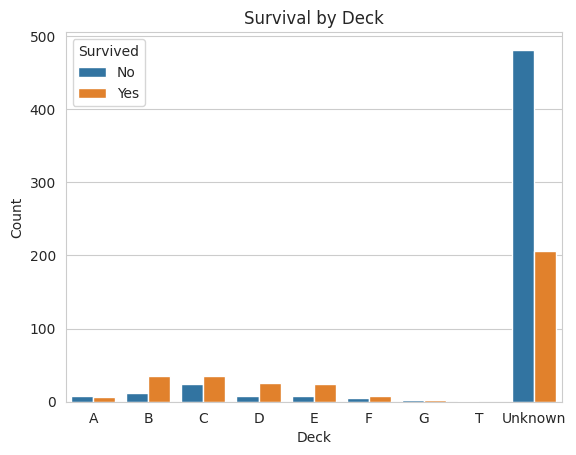

In [47]:
sns.countplot(data=df, x="Deck", hue="Survived", order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown'])
plt.title("Survival by Deck")
plt.xlabel("Deck")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [48]:
df[df["Deck"] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Adult,1,T


In [49]:
df[df["Deck"] == 'G']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Deck
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Children,3,G
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,Children,2,G
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Adult,3,G
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Adult,3,G


Class distribution for Unknown
- As we can tell, a lot of passengers whose Deck is unknown were from 3rd class
- They did not have proper record keeping as they were in 3rd class, and this class was mainly of poor immigrants
- Harder to reach lifeboats from this deck

In [50]:
df[df["Deck"] == 'Unknown']["Pclass"].value_counts()
# sns.countplot(data=df, x="Deck", hue="Pclass")
# plt.show()

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

## Handling Outliers
Outliers we have
- Age: 80 year old passenger
- Fare: 512 fare

Both consist outliers, but the `Fare` is an extreme outlier

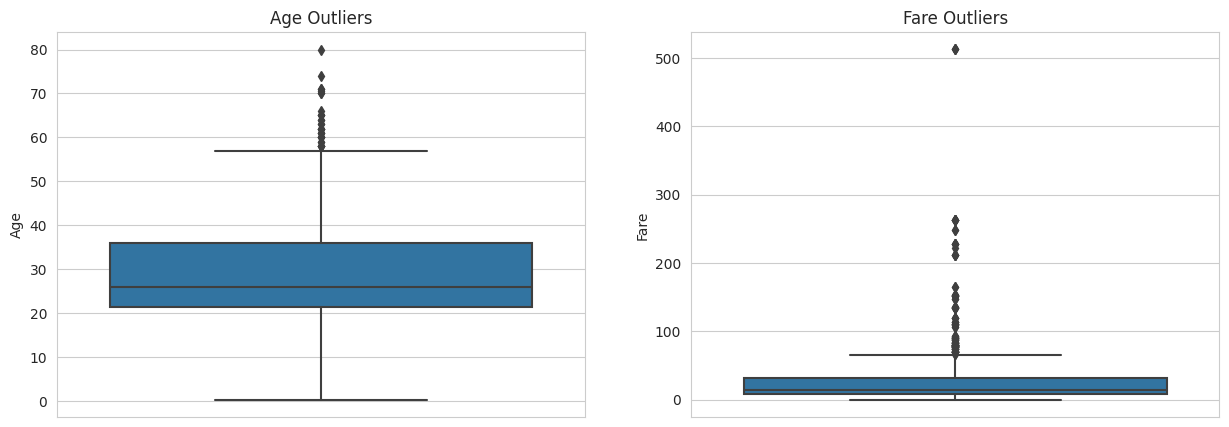

In [51]:
# Boxplots for looking at outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# boxplot for age
sns.boxplot(y=df['Age'], ax=axes[0])
axes[0].set_title("Age Outliers")

# Fare
sns.boxplot(y=df['Fare'], ax=axes[1])
axes[1].set_title("Fare Outliers")


# plt.tight_layout()
plt.show()

Using Outlier boundary formula
- Calculate IQR
- Establish the boundaries
- Data less than lower boundary or data greater than upper boundary is considered outlier 

`Age`
- Number of outilers in Age data is 33
- We won't remove any outlier here as we get the insight from have these old age: elderly --> worse survival 

In [52]:
# calculate the IQR
q1_age = df['Age'].quantile(0.25)
q3_age = df['Age'].quantile(0.75)
iqr_age = q3_age - q1_age

# outlier boundaries
lower_boundary = q1_age - 1.5 * iqr_age
upper_boundary = q3_age + 1.5 * iqr_age

print(f"Age IQR: {iqr_age:.2f}")
print(f"Age outlier boundaries: {lower_boundary:.2f} to {upper_boundary:.2f}")
print(f"Number of age outliers: {len(df[(df['Age'] < lower_boundary) | (df['Age'] > upper_boundary)])}")

Age IQR: 14.50
Age outlier boundaries: -0.25 to 57.75
Number of age outliers: 33


`Fare`
- Number of outliers in Fare data is 116

In [53]:
# calculate the IQR
q1_fare = df['Fare'].quantile(0.25)
q3_fare = df['Fare'].quantile(0.75)
iqr_fare = q3_fare - q1_fare

# outlier boundaries
lower_boundary = q1_fare - 1.5 * iqr_fare
upper_boundary = q3_fare + 1.5 * iqr_fare

print(f"Fare IQR: {iqr_fare:.2f}")
print(f"Fare outlier boundaries: {lower_boundary:.2f} to {upper_boundary:.2f}")
print(f"Number of fare outliers: {len(df[(df['Fare'] < lower_boundary) | (df['Fare'] > upper_boundary)])}")

Fare IQR: 23.09
Fare outlier boundaries: -26.72 to 65.63
Number of fare outliers: 116


Data of Top 10 Highest Fares
- High paying passengers, we know that they had better survival
- We keep these extreme values as they give us an insight: expensive fare --> better survival

In [54]:
df.nlargest(10, 'Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,Deck
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Adult,1,Unknown
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Adult,2,B
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Adult,1,B
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Adult,6,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Adult,6,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Adult,6,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Elderly,6,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Adult,5,B
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Adult,5,B
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Adult,2,B


## Correlation
- `Pclass` - `Survived`: negative relationship (-0.34)
  - This is what we found, lower class --> low survival
- `Fare` - `Survived`: positive relationship (+0.26)
  - Higher fare --> High class --> better survival
- `Age` - `Survived`: Weak Correlation (-0.06)
  - Not what we found
  - We found that children fared better than adults and old people
  - Since Age and Survived are non-linear relationships and correlation matrix is not quite good at finding those
- `FamilySize` - `Survived`: Weak correlation (+0.02)
   - We found that small family, better survival
   - 0: bad, 2-4: good,5+: bad
- `SibSp` and `Parch` - `FamilySize`: positive relationship (+0.89 and +0.78 respectively)
  - Sblings/Spouses/Parent/Childre contribute to family size so makes sense
- `Fare` - `Pclass`: negative relationship (-0.55)
  - Lower class had cheaper fare (inverse relationship)
- `Pclass` - `Age`: negative relationship (-0.41)
  - Lower class had younger passengers as we saw earlier


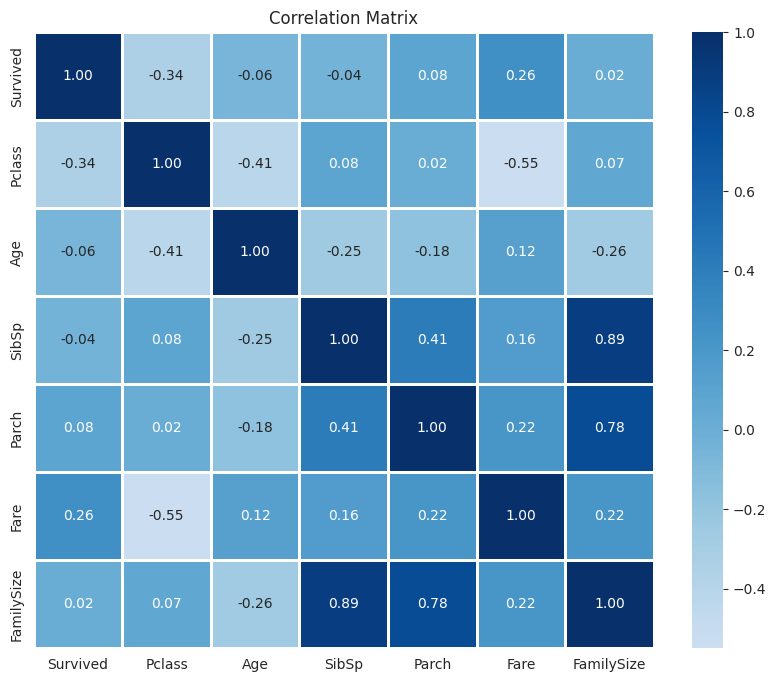

In [55]:
# Using numerical columns for correlation
corr_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
corr_matrix = df[corr_columns].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues', center=0, linewidths=1)
plt.title("Correlation Matrix")
plt.show()

---
## Key Findings

Primary factors that influenced survival:

### 1. Passenger Class (Major Predictor) 
- **1st Class: 63% survived** vs **3rd Class: 24% survived**
- Correlation: -0.34 (negative = lower class = worse survival)

### 2. Gender
- **Females: 74% survived** vs **Males: 19% survived**  

### 3. Family Size (Optimal: 2-4 people)
- Solo travelers: 30% survival
- Small families: 58% survival
- Large families (5+): 16% survival

### 4. Deck Location
- Upper decks (A-C): Better lifeboat access
- Lower decks/Unknown: 70% mortality

### 5. Age
- Children prioritized, but elderly struggled

---